In [1]:
!pip install datasets transformers evaluate seqeval huggingface_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.0 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=50945354224cfdca539385d761da57f39a40302b3b46be12ffb8db45c79c8beb
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


## Prepare dataset

In [2]:
from datasets import load_dataset

raw_datasets = load_dataset("conll2003")

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [3]:
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 14041
    })
    validation: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3250
    })
    test: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3453
    })
})

In [4]:
raw_datasets["train"][0]["tokens"]

['EU', 'rejects', 'German', 'call', 'to', 'boycott', 'British', 'lamb', '.']

In [5]:
raw_datasets["train"][0]["pos_tags"]

[22, 42, 16, 21, 35, 37, 16, 21, 7]

In [6]:
label_names = raw_datasets["train"].features["pos_tags"].feature.names
label_names

['"',
 "''",
 '#',
 '$',
 '(',
 ')',
 ',',
 '.',
 ':',
 '``',
 'CC',
 'CD',
 'DT',
 'EX',
 'FW',
 'IN',
 'JJ',
 'JJR',
 'JJS',
 'LS',
 'MD',
 'NN',
 'NNP',
 'NNPS',
 'NNS',
 'NN|SYM',
 'PDT',
 'POS',
 'PRP',
 'PRP$',
 'RB',
 'RBR',
 'RBS',
 'RP',
 'SYM',
 'TO',
 'UH',
 'VB',
 'VBD',
 'VBG',
 'VBN',
 'VBP',
 'VBZ',
 'WDT',
 'WP',
 'WP$',
 'WRB']

* " : Double quotation mark
* ' : Single quotation mark
* \# : Pound sign (often used for hashtags)
* \$ : Dollar sign
* ( : Left parenthesis
* ) : Right parenthesis
* , : Comma
* . : Period or full stop
* : : Colon
* CC : Coordinating conjunction
* CD : Cardinal number
* DT : Determiner
* EX : Existential there
* FW : Foreign word
* IN : Preposition or subordinating conjunction
* JJ : Adjective
* JJR : Adjective, comparative
* JJS : Adjective, superlative
* LS : List item marker
* MD : Modal
* NN : Noun, singular or mass
* NNP : Proper noun, singular
* NNPS : Proper noun, plural
* NNS : Noun, plural
* NN|SYM : Noun or symbol
* PDT : Predeterminer
* POS : Possessive ending
* PRP : Personal pronoun
* PRP\$ : Possessive pronoun
* RB : Adverb
* RBR : Adverb, comparative
* RBS : Adverb, superlative
* RP : Particle
* SYM : Symbol
* TO : to
* UH : Interjection
* VB : Verb, base form
* VBD : Verb, past tense
* VBG : Verb, gerund or present participle
* VBN : Verb, past participle
* VBP : Verb, non-3rd person singular present
* VBZ : Verb, 3rd person singular present
* WDT : Wh-determiner
* WP : Wh-pronoun
* WP$ : Possessive wh-pronoun
* WRB : Wh-adverb

Visualize class distribution

In [7]:
import collections

labels = raw_datasets["train"]["pos_tags"]
tags = [label_names[li] for l in labels for li in l]

counts = {}
for tag in tags:
  if tag in counts:
    counts[tag] += 1
  else:
    counts[tag] = 1

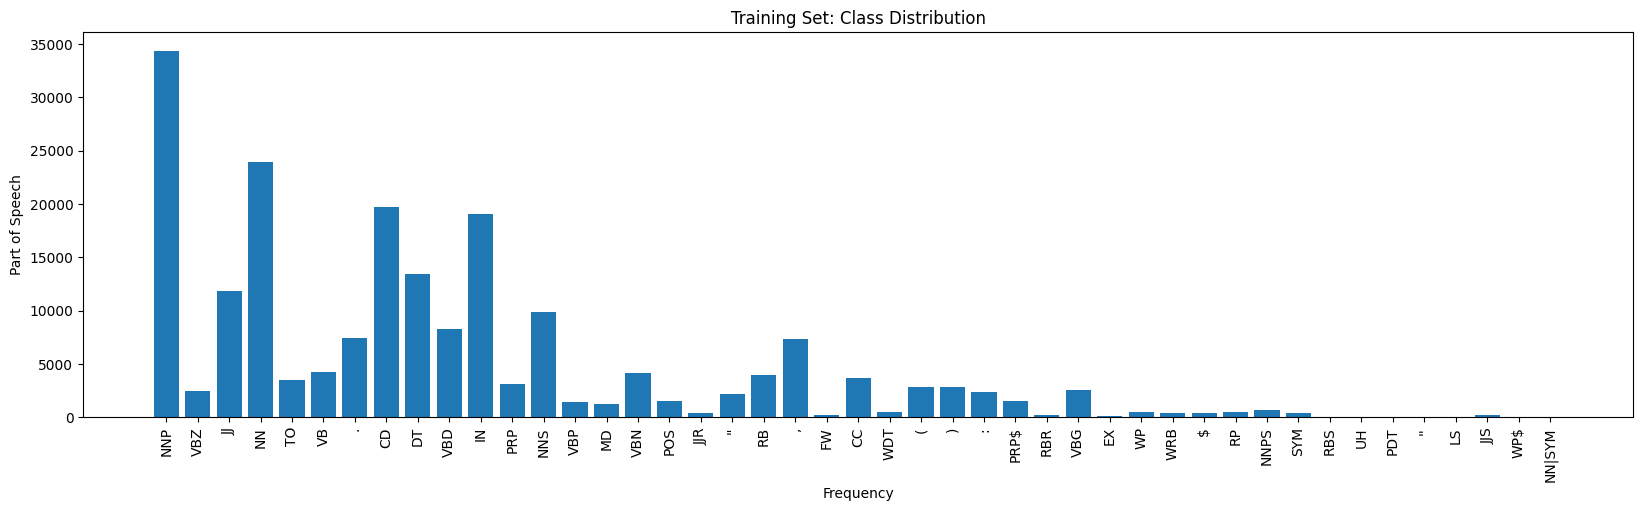

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.bar(x=counts.keys(), height=counts.values())
plt.xticks(rotation=90)
plt.xlabel("Frequency")
plt.ylabel("Part of Speech")
plt.title("Training Set: Class Distribution")
plt.show()

Quite an uneven class distribution

Load model and tokenizer

In [9]:
from transformers import AutoTokenizer

checkpoint = "bert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [10]:
example = raw_datasets["train"][123]

In [11]:
print(example["tokens"])

['A', 'Polish', 'diplomat', 'on', 'Thursday', 'denied', 'a', 'Polish', 'tabloid', 'report', 'this', 'week', 'that', 'Libya', 'was', 'refusing', 'exit', 'visas', 'to', '100', 'Polish', 'nurses', 'trying', 'to', 'return', 'home', 'after', 'working', 'in', 'the', 'North', 'African', 'country', '.']


In [12]:
print(example["pos_tags"])

[12, 16, 21, 15, 22, 38, 12, 16, 16, 21, 12, 21, 15, 22, 38, 39, 21, 24, 35, 11, 16, 24, 39, 35, 37, 21, 15, 39, 15, 12, 16, 16, 21, 7]


In [13]:
encoding = tokenizer(example["tokens"], is_split_into_words=True)

In [14]:
print(encoding.tokens())

['[CLS]', 'A', 'Polish', 'diplomat', 'on', 'Thursday', 'denied', 'a', 'Polish', 'ta', '##bloid', 'report', 'this', 'week', 'that', 'Libya', 'was', 'refusing', 'exit', 'visa', '##s', 'to', '100', 'Polish', 'nurses', 'trying', 'to', 'return', 'home', 'after', 'working', 'in', 'the', 'North', 'African', 'country', '.', '[SEP]']


In [15]:
print(encoding.word_ids())

[None, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, None]


In [16]:
print(example["pos_tags"])

[12, 16, 21, 15, 22, 38, 12, 16, 16, 21, 12, 21, 15, 22, 38, 39, 21, 24, 35, 11, 16, 24, 39, 35, 37, 21, 15, 39, 15, 12, 16, 16, 21, 7]


In [17]:
print(f"Length of tokens: {len(encoding.tokens())}")
print(f"Length of pos tags: {len(example['pos_tags'])}")

Length of tokens: 38
Length of pos tags: 34


There's a mismatch, so we need to update the labels after tokenizing each sentence. We want each token to match to a pos_tag, so we need to add in some additional pos_tags for the extra tokens. These extra tokens include the [CLS] and [SEP] tokens, but also the tokens for the words that have been divided into sub-words.

In [18]:
def align_pos_tags(pos_tags, word_ids):
  new_labels = []
  for word_id in word_ids:
    if word_id is None:
      new_labels.append(-100)
    else:
      new_labels.append(pos_tags[word_id])
  return new_labels

In [19]:
aligned_pos_tags = align_pos_tags(example["pos_tags"], encoding.word_ids())

In [20]:
print(aligned_pos_tags)

[-100, 12, 16, 21, 15, 22, 38, 12, 16, 16, 16, 21, 12, 21, 15, 22, 38, 39, 21, 24, 24, 35, 11, 16, 24, 39, 35, 37, 21, 15, 39, 15, 12, 16, 16, 21, 7, -100]


In [21]:
print(encoding.word_ids())

[None, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, None]


Now let's create a function which takes in a batch of `examples`, tokenizes them, and aligns them. We can then pass this function to `raw_datasets.map()`

In [22]:
def tokenize_and_align(examples):
  # tokenizer automatically handles multiple examples
  tokenized_examples = tokenizer(
      examples["tokens"], truncation=True, is_split_into_words=True, # no padding because we will do dynamic padding with collator
  )

  # we are going to create new pos_tags
  tokenized_examples["labels"] = []

  # align each example
  for i in range(len(examples["id"])):
    old_pos_tags = examples["pos_tags"][i]
    word_ids = tokenized_examples.word_ids(i)
    aligned_pos_tags = align_pos_tags(old_pos_tags, word_ids)
    tokenized_examples["labels"].append(aligned_pos_tags)

  return tokenized_examples

In [23]:
test_batch = raw_datasets["train"][:3]

In [24]:
test_batch

{'id': ['0', '1', '2'],
 'tokens': [['EU',
   'rejects',
   'German',
   'call',
   'to',
   'boycott',
   'British',
   'lamb',
   '.'],
  ['Peter', 'Blackburn'],
  ['BRUSSELS', '1996-08-22']],
 'pos_tags': [[22, 42, 16, 21, 35, 37, 16, 21, 7], [22, 22], [22, 11]],
 'chunk_tags': [[11, 21, 11, 12, 21, 22, 11, 12, 0], [11, 12], [11, 12]],
 'ner_tags': [[3, 0, 7, 0, 0, 0, 7, 0, 0], [1, 2], [5, 0]]}

In [25]:
tokenized_batch = tokenize_and_align(test_batch)

In [26]:
tokenized_batch

{'input_ids': [[101, 7270, 22961, 1528, 1840, 1106, 21423, 1418, 2495, 12913, 119, 102], [101, 1943, 14428, 102], [101, 26660, 13329, 12649, 15928, 1820, 118, 4775, 118, 1659, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], 'labels': [[-100, 22, 42, 16, 21, 35, 37, 16, 21, 21, 7, -100], [-100, 22, 22, -100], [-100, 22, 22, 22, 22, 11, 11, 11, 11, 11, -100]]}

Apply tokenization to dataset

In [27]:
tokenized_datasets = raw_datasets.map(
    tokenize_and_align,
    batched=True,
    remove_columns=raw_datasets["train"].column_names
)

Map:   0%|          | 0/14041 [00:00<?, ? examples/s]

Map:   0%|          | 0/3250 [00:00<?, ? examples/s]

Map:   0%|          | 0/3453 [00:00<?, ? examples/s]

In [28]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 14041
    })
    validation: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 3250
    })
    test: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 3453
    })
})

In [29]:
tokenized_datasets["train"][0]

{'input_ids': [101,
  7270,
  22961,
  1528,
  1840,
  1106,
  21423,
  1418,
  2495,
  12913,
  119,
  102],
 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'labels': [-100, 22, 42, 16, 21, 35, 37, 16, 21, 21, 7, -100]}

## Fine-tuning

In [30]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(
    tokenizer=tokenizer, return_tensors="tf"
)

In [31]:
test_batch = [tokenized_datasets["train"][i] for i in range(2)]

In [32]:
for ex in test_batch:
  print(tokenizer.decode(ex["input_ids"]))

[CLS] EU rejects German call to boycott British lamb. [SEP]
[CLS] Peter Blackburn [SEP]


In [33]:
# data collator will add padding
collated_batch = data_collator(test_batch)

for ex_input_ids in collated_batch["input_ids"]:
  print(tokenizer.decode(ex_input_ids))

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


[CLS] EU rejects German call to boycott British lamb. [SEP]
[CLS] Peter Blackburn [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


In [34]:
batch_size = 8
columns = ["input_ids", "token_type_ids", "attention_mask", "labels"]

tf_train_dataset = tokenized_datasets["train"].to_tf_dataset(
    batch_size=batch_size,
    columns=columns,
    shuffle=True,
    collate_fn=data_collator,
)

tf_eval_dataset = tokenized_datasets["validation"].to_tf_dataset(
    batch_size=batch_size,
    columns=columns,
    shuffle=False,
    collate_fn=data_collator,
)

In [35]:
label_names

['"',
 "''",
 '#',
 '$',
 '(',
 ')',
 ',',
 '.',
 ':',
 '``',
 'CC',
 'CD',
 'DT',
 'EX',
 'FW',
 'IN',
 'JJ',
 'JJR',
 'JJS',
 'LS',
 'MD',
 'NN',
 'NNP',
 'NNPS',
 'NNS',
 'NN|SYM',
 'PDT',
 'POS',
 'PRP',
 'PRP$',
 'RB',
 'RBR',
 'RBS',
 'RP',
 'SYM',
 'TO',
 'UH',
 'VB',
 'VBD',
 'VBG',
 'VBN',
 'VBP',
 'VBZ',
 'WDT',
 'WP',
 'WP$',
 'WRB']

In [36]:
id2label = { i:l for i,l in enumerate(label_names) }
label2id = { l:i for l,i in id2label.items() }

In [37]:
print(id2label)

{0: '"', 1: "''", 2: '#', 3: '$', 4: '(', 5: ')', 6: ',', 7: '.', 8: ':', 9: '``', 10: 'CC', 11: 'CD', 12: 'DT', 13: 'EX', 14: 'FW', 15: 'IN', 16: 'JJ', 17: 'JJR', 18: 'JJS', 19: 'LS', 20: 'MD', 21: 'NN', 22: 'NNP', 23: 'NNPS', 24: 'NNS', 25: 'NN|SYM', 26: 'PDT', 27: 'POS', 28: 'PRP', 29: 'PRP$', 30: 'RB', 31: 'RBR', 32: 'RBS', 33: 'RP', 34: 'SYM', 35: 'TO', 36: 'UH', 37: 'VB', 38: 'VBD', 39: 'VBG', 40: 'VBN', 41: 'VBP', 42: 'VBZ', 43: 'WDT', 44: 'WP', 45: 'WP$', 46: 'WRB'}


In [38]:
print(label2id)

{0: '"', 1: "''", 2: '#', 3: '$', 4: '(', 5: ')', 6: ',', 7: '.', 8: ':', 9: '``', 10: 'CC', 11: 'CD', 12: 'DT', 13: 'EX', 14: 'FW', 15: 'IN', 16: 'JJ', 17: 'JJR', 18: 'JJS', 19: 'LS', 20: 'MD', 21: 'NN', 22: 'NNP', 23: 'NNPS', 24: 'NNS', 25: 'NN|SYM', 26: 'PDT', 27: 'POS', 28: 'PRP', 29: 'PRP$', 30: 'RB', 31: 'RBR', 32: 'RBS', 33: 'RP', 34: 'SYM', 35: 'TO', 36: 'UH', 37: 'VB', 38: 'VBD', 39: 'VBG', 40: 'VBN', 41: 'VBP', 42: 'VBZ', 43: 'WDT', 44: 'WP', 45: 'WP$', 46: 'WRB'}


In [39]:
from transformers import TFAutoModelForTokenClassification

model = TFAutoModelForTokenClassification.from_pretrained(
    checkpoint,
    id2label=id2label,
    label2id=label2id
)

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForTokenClassification.

Some weights or buffers of the TF 2.0 model TFBertForTokenClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [40]:
from huggingface_hub import notebook_login

notebook_login()

In [41]:
from transformers import create_optimizer

num_epochs = 3
num_train_steps = len(tf_train_dataset) * num_epochs

optimizer, schedule = create_optimizer(
    init_lr=2e-5,
    num_warmup_steps=0,
    num_train_steps=num_train_steps,
    weight_decay_rate=0.01
)

model.compile(optimizer=optimizer)

In [42]:
from transformers.keras_callbacks import PushToHubCallback

callback = PushToHubCallback(output_dir="bert-finetuned-pos", tokenizer=tokenizer)

model.fit(
    tf_train_dataset,
    validation_data=tf_eval_dataset,
    epochs=num_epochs
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'Repository' (from 'huggingface_hub.repository') is deprecated and will be removed from version '1.0'. Please prefer the http-based alternatives instead. Given its large adoption in legacy code, the complete removal is only planned on next major release.
For more details, please read https://huggingface.co/docs/huggingface_hub/concepts/git_vs_http.
  warnings.warn(warning_message, FutureWarning)
Cloning https://huggingface.co/raj-p/bert-finetuned-pos into local empty directory.


Epoch 1/3
1756/1756 [==============================] - 268s 138ms/step - loss: 0.4499 - val_loss: 0.3318
Epoch 2/3
1756/1756 [==============================] - 238s 135ms/step - loss: 0.2130 - val_loss: 0.2928
Epoch 3/3
1756/1756 [==============================] - 239s 136ms/step - loss: 0.1602 - val_loss: 0.2907


## Evaluation

In [44]:
import numpy as np

all_predictions = []
all_labels = []
for batch in tf_eval_dataset:
  logits = model.predict_on_batch(batch)["logits"]
  predictions = np.argmax(logits, axis=-1)
  labels = batch["labels"]
  for prediction, label in zip(predictions, labels):
    for predicted_idx, label_idx in zip(prediction, label):
      if label_idx == -100:
        continue
      all_predictions.append(label_names[predicted_idx])
      all_labels.append(label_names[label_idx])

In [46]:
import evaluate

metric = evaluate.load("poseval")

In [47]:
results = metric.compute(predictions=[all_predictions], references=[all_labels])
results

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'"': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 640},
 '$': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 108},
 "''": {'precision': 1.0,
  'recall': 0.5454545454545454,
  'f1-score': 0.7058823529411764,
  'support': 11},
 '(': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 679},
 ')': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 680},
 ',': {'precision': 1.0,
  'recall': 0.9994869163673679,
  'f1-score': 0.9997433923530921,
  'support': 1949},
 '.': {'precision': 0.998936735778841,
  'recall': 1.0,
  'f1-score': 0.999468085106383,
  'support': 1879},
 ':': {'precision': 0.9786628733997155,
  'recall': 0.9555555555555556,
  'f1-score': 0.9669711876317638,
  'support': 720},
 'CC': {'precision': 1.0,
  'recall': 0.9989270386266095,
  'f1-score': 0.9994632313472893,
  'support': 932},
 'CD': {'precision': 0.8916806924741525,
  'recall': 0.9847318109399894,
  'f1-score': 0.9358990536277603,
  'support': 7532},
 'DT': {'pr

In [58]:
import pandas as pd

key_results = pd.DataFrame(
    { k:v for k, v in results.items() if k in label_names }
).transpose()

key_results

,precision,recall,f1-score,support
"""",1.000000,1.000000,1.000000,640.0
$,1.000000,1.000000,1.000000,108.0
'',1.000000,0.545455,0.705882,11.0
(,1.000000,1.000000,1.000000,679.0
),1.000000,1.000000,1.000000,680.0
",",1.000000,0.999487,0.999743,1949.0
.,0.998937,1.000000,0.999468,1879.0
:,0.978663,0.955556,0.966971,720.0
CC,1.000000,0.998927,0.999463,932.0
CD,0.891681,0.984732,0.935899,7532.0


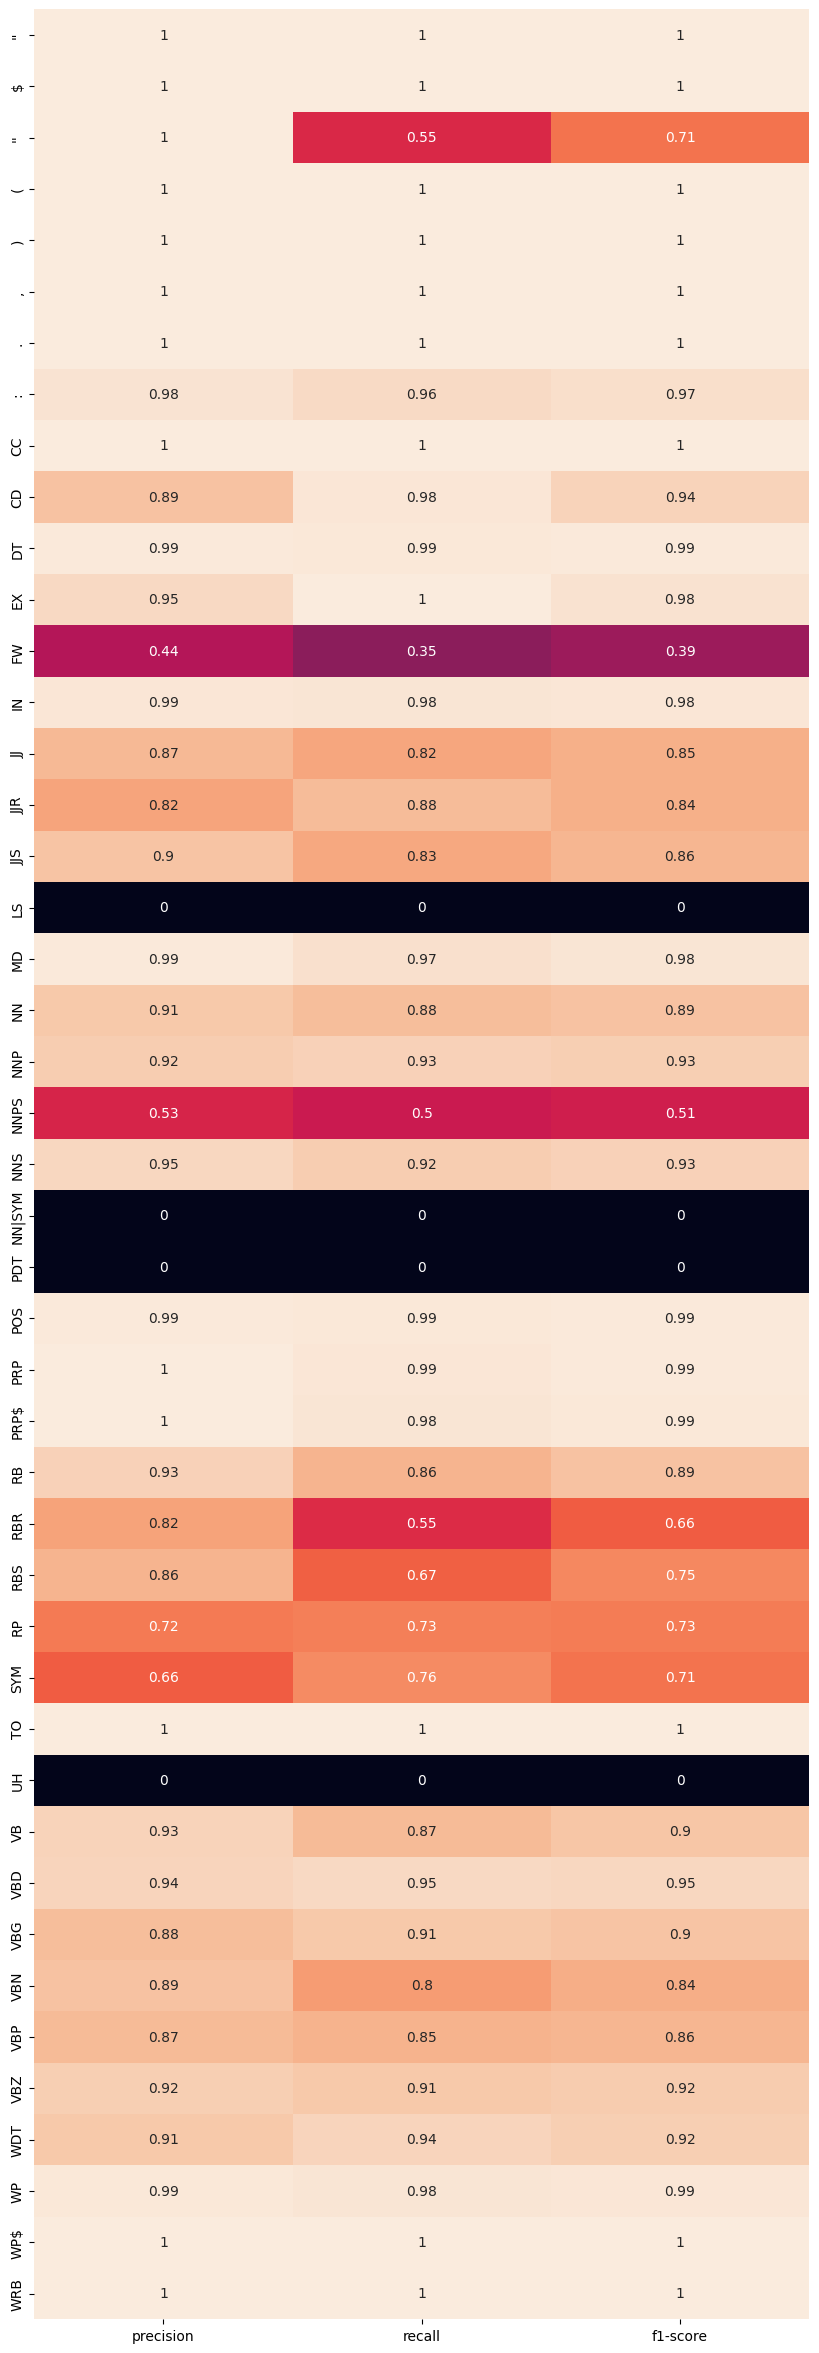

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 30))
sns.heatmap(key_results[["precision", "recall", "f1-score"]], annot=True, cbar=False)
plt.show()